# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_data = pd.merge(study_results, mouse_metadata, how ="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
complete_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_mouse_data[complete_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
dup_ID = duplicates["Mouse ID"]
pd.unique(dup_ID)


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_full_data = complete_mouse_data[complete_mouse_data["Mouse ID"] == "g989"]
duplicated_full_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newdf = complete_mouse_data.loc[complete_mouse_data["Mouse ID"] != "g989"]
newdf["Mouse ID"].nunique()
newdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
newdf["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = newdf.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = newdf.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = newdf.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = newdf.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = newdf.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sum_stat_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "StD": std,
    "SEM": sem})
sum_stat_df

,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timestamps'>

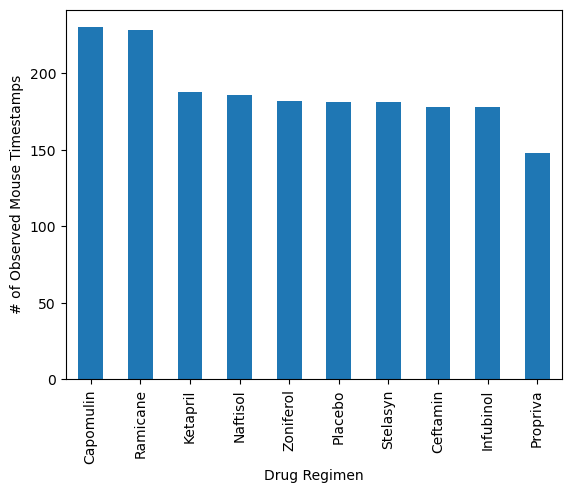

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. (DataFrame.plot/Pandas)
regimen_counts =  newdf.groupby("Drug Regimen")["Mouse ID"].count()
df = pd.DataFrame({
    "Count": regimen_counts})
df = df.sort_values(by = "Count",ascending=False)

df.plot.bar(legend = False, ylabel = "# of Observed Mouse Timestamps")

Text(0, 0.5, '# of Observed Mouse Timestamps')

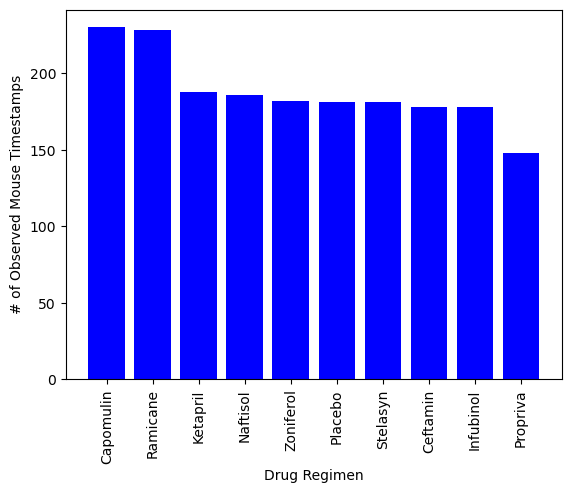

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimens = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
Counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

plt.bar(Drug_Regimens, Counts, color = "b", align = "center")
plt.tick_params(axis = 'x', labelrotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timestamps")

<Axes: ylabel='Sex'>

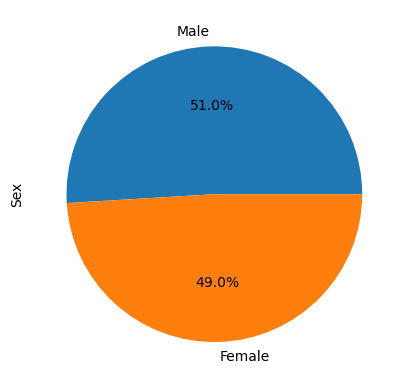

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf = newdf.groupby(["Sex"])["Mouse ID"].count()
mf_dist = pd.DataFrame({
    "Sex Dist": mf})
mf_dist = mf_dist.sort_values(by = "Sex",ascending=False)

mf_dist.plot.pie(y= "Sex Dist", legend = False, ylabel = "Sex", autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

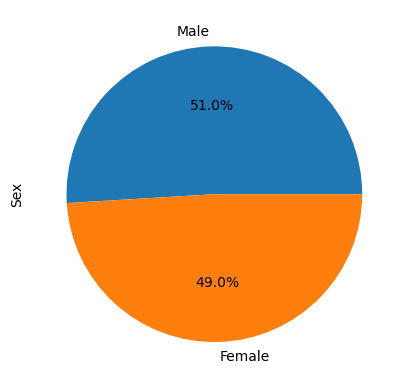

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mfarray = mf_dist.values.flatten()
labels = ["Male", "Female"]

plt.pie(mfarray, autopct ="%1.1f%%", labels = labels)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = newdf.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = pd.DataFrame({
    "Timepoint": last_timepoint})
last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(newdf, last_timepoint, on=["Timepoint", "Mouse ID"])
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treatments:
    tumorvol = merged.loc[merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #Append
    TumorVolume.append(tumorvol)
    
    # Determine outliers using upper and lower bounds
Outliers = {}
for drug, volumes in zip(Treatments, TumorVolume):
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #Finding Outliers
    Outliers_Vols = volumes[(volumes < lower_bound) | (volumes > upper_bound )]
    Outliers[drug] = Outliers_Vols.values
    print(f"{drug} potential outliers: {Outliers[drug]}")
    
    


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


C:\Users\caleb\AppData\Local\Temp\ipykernel_8740\11749255.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Treatments)


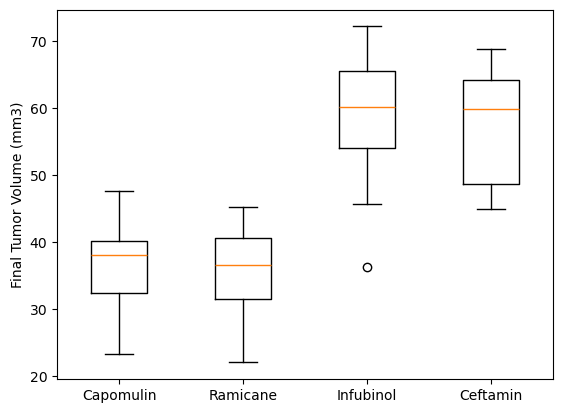

In [49]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(Treatments)
ax1.boxplot(TumorVolume)
plt.show()


## Line and Scatter Plots

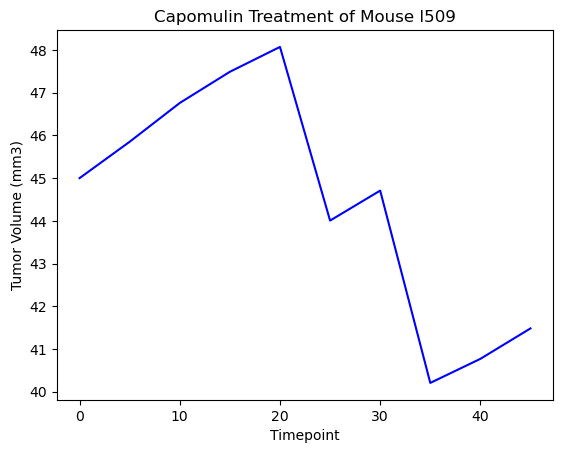

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"
Cap_mouse = newdf.loc[newdf["Mouse ID"] == mouse, ["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(Cap_mouse["Timepoint"], Cap_mouse["Tumor Volume (mm3)"], color = 'b')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

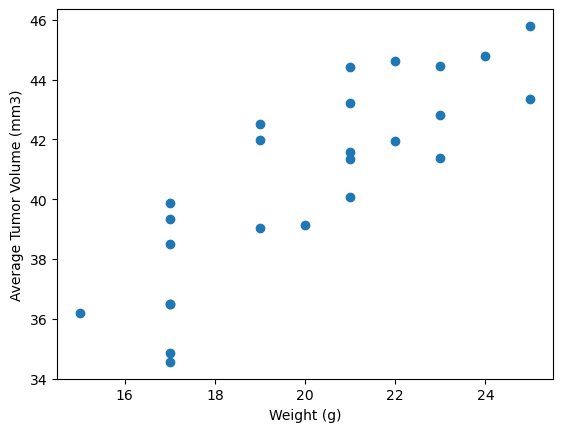

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_avg = newdf.loc[newdf["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
Avg_tumor = Cap_avg.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = Cap_avg.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(weight, Avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.842


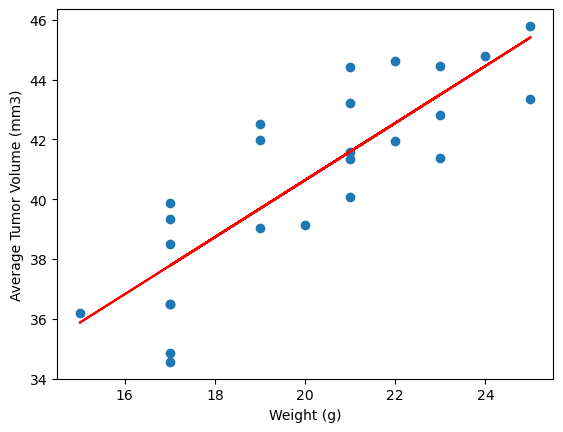

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, Avg_tumor)

# Regression line equation
regression_line = weight * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 3)}")

# Plot
plt.scatter(weight, Avg_tumor)
plt.plot(weight, regression_line, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()